### Pseudo-Hamiltonian for the simple harmonic oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy.matrices

(a)

By inspection of the Leapfrog update:

\begin{equation}
    v_{n+1/2} = v_n + a_n \frac{h}{2},
\end{equation}

\begin{equation}
    x_{n+1} = x_n + hv_{n+1/2},
\end{equation}

\begin{equation}
    v_{n+1} = v_{n+1/2} + ha_{n+1}.
\end{equation}

From the above relations and using $a_n = -x_n$, we can obtain the Jacobian matrix as follows:

\begin{equation}
    J = \begin{pmatrix} 1-h^2/2 & h \\ h^3/4-h & 1-h^2/2 \end{pmatrix}
\end{equation}

The pseudo-hamiltonian is defined as

\begin{equation}
    \tilde{H} = \frac{1}{2}x^2 + \frac{1}{2}v^2 \frac{1}{1-h^2/4}.
\end{equation}

Multiplying by 2, we get

\begin{equation}
    2\tilde{H} = x^2 + v^2 \frac{1}{1-h^2/4} = \pmatrix{x & v \frac{1}{\sqrt{1-h^2/4}}} \cdot \pmatrix{x \\ v \frac{1}{\sqrt{1-h^2/4}}}
\end{equation}

and the time update becomes

\begin{equation}
    2\tilde{H_{n+1}} = \pmatrix{x_n & v_n \frac{1}{\sqrt{1-h^2/4}}} \cdot \mathbf{J^TJ} \cdot \pmatrix{x_n \\ v_n \frac{1}{\sqrt{1-h^2/4}}}
\end{equation}

In [2]:
h = sympy.Symbol('h')
X = sympy.Symbol('x')
V = sympy.Symbol('v')


J = sympy.matrices.Matrix([[1-h**2/2,h], [h**3/4-h,1-h**2/2]])

vectors = sympy.matrices.Matrix([X, V*1/(1-h**2/4)**0.5])
H_1 = vectors.T*J.T*J*vectors
H = vectors.T*vectors

print(sympy.simplify(H_1 - H)/2)


Matrix([[0.03125*h**6*x**2 - 0.25*h**5*v*x/(4 - h**2)**0.5 + 0.5*h**4*v**2/(4 - h**2)**1.0 - 0.125*h**4*x**2 + 0.5*h**3*v*x/(4 - h**2)**0.5]])


In a more readable fashion, the error in the pseudo-hamiltonian is 

\begin{equation}
    \frac{h^6 x^2}{32} - \frac{h^5 vx}{4 \sqrt{4-h^2}} + \frac{h^4 v^2}{2(4 - h^2)} - \frac{h^4 x^2}{8} + \frac{h^3 vx}{2 \sqrt{4 - h^2}}
\end{equation}

Integrating over a full cycle, the $h^5$ and $h^3$ terms average to $0$, which means that the error is dominated by fourth-order terms. Therefore, the pseudo-hamiltonian is conserved with a fourth order error.

In [3]:
# (b)

# Pseudo-Hamiltonian
def H(x, v, h):
    return x**2/2 + v**2/2  * (1/(1-h**2/4))

# leapfrog method
def leapfrog(h, x0, v0, num_steps):
    x = np.zeros(num_steps)
    v = np.zeros(num_steps)

    x[0] = x0
    v[0] = v0

    for i in range(num_steps-1):
        v_half = v[i] - h / 2 * x[i]
        x[i+1] = x[i] + h * v_half
        v[i+1] = v_half - h / 2 * x[i+1]

    return x, v

# Set initial conditions
x0 = 1.0  # initial position
v0 = 0.0  # initial velocity
n_step = 1000
h_value = 2*np.pi/n_step

# Integrate
positions, velocities = leapfrog(h_value, x0, v0, n_step)

# Calculate pseudo-hamiltonian
error_ps = abs(H(positions[-1], velocities[-1], h_value) - H(positions[0], velocities[0], h_value))
print(error_ps)

2.220446049250313e-16


The error in $\tilde{H}$ is on the scale of $10^{-16}$, which is dominated by roundoff. Therefore, we can conclude that $\tilde{H}$ is conserved.

In [4]:
# (c)

# Energy
def E(x, v, h):
    return 0.5*(x**2 + v**2)

steps = np.logspace(1, 5, 100)
half = np.zeros(len(steps))
full = np.zeros(len(steps))

for i, step in enumerate(steps):
    h_value = 2*np.pi/step
    pos1, vel1 = leapfrog(h_value, x0, v0, int(step/2))
    pos2, vel2 = leapfrog(h_value, x0, v0, int(step))
    half[i] = abs((E(pos1[-1], vel1[-1], h_value) - E(pos2[0], vel2[0], h_value)))
    full[i] = abs((E(pos2[-1], vel2[-1], h_value) - E(pos2[0], vel2[0], h_value)))

[]

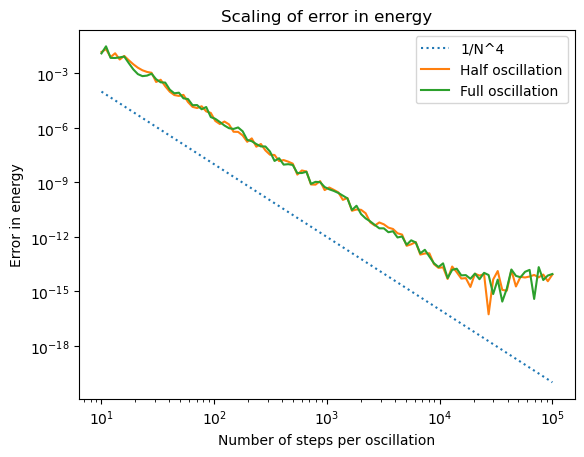

In [5]:
# Plotting

def f4(x):
    return x**-4

plt.plot(steps, f4(steps), ':', label = "1/N^4")
plt.plot(steps, half, label = "Half oscillation")
plt.plot(steps, full, label = "Full oscillation")
plt.xlabel("Number of steps per oscillation")
plt.ylabel("Error in energy")
plt.title("Scaling of error in energy")
plt.legend()
plt.loglog()

In both the full and half oscillation cases, the error in energy have a quartic scaling with the number of steps per oscillation. This is in agreement with what we found analytically in part (a).

### Eigenvalue problem for the wave on a string

(a)

Starting from the wave equation,

\begin{equation}
    \rho(x)\frac{\partial^2 f}{\partial t^2} = \frac{\partial^2 f}{\partial x^2}.
\end{equation}

For a normal mode, we get

\begin{equation}
    \frac{d^2 f}{dx^2} = -\omega^2\rho(x)f.
\end{equation}

Using finite-differencing in $x$, we get

\begin{equation}
    \frac{f_{i+1} - 2f_i + f_{i-1}}{(\Delta x)^2} = -\omega^2\rho_if.
\end{equation}

This can then be written in matrix form as

\begin{equation}
    \mathbf{A \cdot f} = \omega^2 \mathbf{b \cdot f},
\end{equation}

where $\textbf{A}$ is a tridiagonal matrix with $-2$ on the diagonal and $1$ on the off-diagonals, and $\textbf{b}$ is a diagonal matrix with the corresponding density at each gridpoint. The negative sign can be absorbed into $\textbf{A}$.

Found ω = 0.999 pi, n = 0
Found ω = 1.998 pi, n = 1
Found ω = 2.997 pi, n = 2
Found ω = 3.996 pi, n = 3
Found ω = 4.995 pi, n = 4
Found ω = 5.994 pi, n = 5
Found ω = 6.993 pi, n = 6
Found ω = 7.992 pi, n = 7


Text(0.06, 0.5, 'Amplitude')

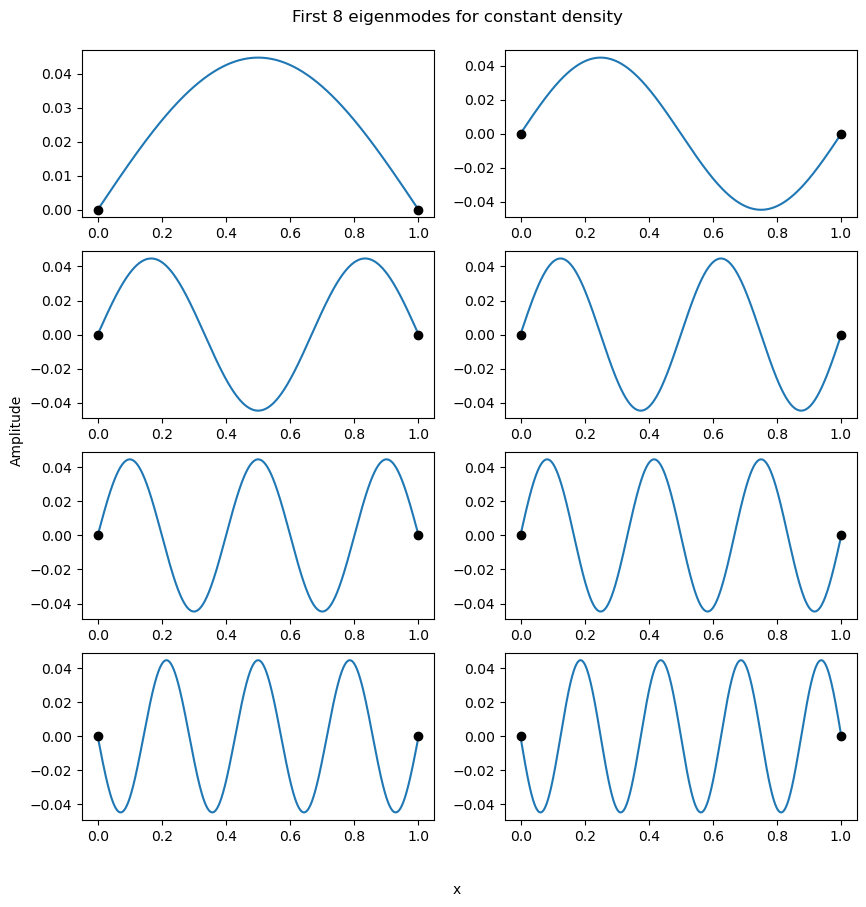

In [6]:
# (b)
# Constant density

import scipy

# Set up grid
n = 1000
x = np.linspace(0, 1, n)

# Constuct matrix
A = np.diag(-2*np.ones(n)) + np.diag(np.ones(n-1), k=1) + np.diag(np.ones(n-1), k=-1)


# Get eigenvalues and eigenvectors
wsq1, f1 = scipy.linalg.eigh(-A)  # we are actually getting w**2 here
w1 = wsq1[:8]**0.5  # only the first 8, same for f
f1 = f1[:,:8]


# Plotting
figure = plt.figure(figsize=(10, 10))
for i, freq in enumerate(w1):
    print("Found \u03C9 = %lg pi, n = %d" % (round(w1[i]/np.pi*n,3), i))
    plt.subplot(4,2,1+i)
    plt.plot(x, f1[:,i])
    plt.plot((0,1), (0,0), 'ko')

plt.suptitle("First 8 eigenmodes for constant density", y=0.92)
figure.text(0.5, 0.04, 'x', ha='center', va='center')
figure.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')

In the case of a constant density string, the frequencies obtained above agree with the results found in class (ie: integer multiples of $\pi$). However, the results here are not as precise. The values drift farther from the integer answer as we go up the frequency table. This can be improved by using a finer grid (here I used 1000 points).

Found ω = 0.493 pi, n = 0
Found ω = 1.016 pi, n = 1
Found ω = 1.533 pi, n = 2
Found ω = 2.046 pi, n = 3
Found ω = 2.558 pi, n = 4
Found ω = 3.07 pi, n = 5
Found ω = 3.581 pi, n = 6
Found ω = 4.092 pi, n = 7


Text(0.06, 0.5, 'Amplitude')

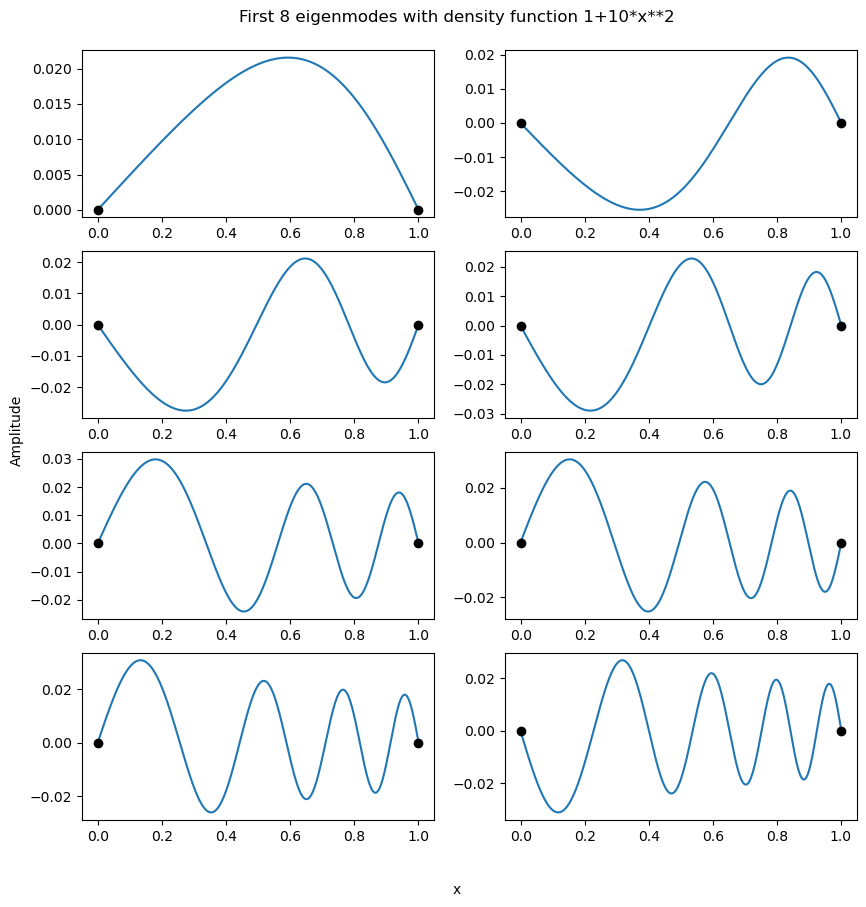

In [7]:
# With a density function

def rho(x):
    rho = 1.0 + 10*x**2
    return rho


wsq2, f2 = scipy.linalg.eigh(-A, np.diag(rho(x)))
w2 = wsq2[:8]**0.5
f2 = f2[:,:8]


# Plotting
figure = plt.figure(figsize=(10, 10))
for i, freq in enumerate(w2):
    print("Found \u03C9 = %lg pi, n = %d" % (round(w2[i]/np.pi*n,3), i))
    plt.subplot(4,2,1+i)
    plt.plot(x, f2[:,i])
    plt.plot((0,1), (0,0), 'ko')

plt.suptitle("First 8 eigenmodes with density function 1+10*x**2", y=0.92)
figure.text(0.5, 0.04, 'x', ha='center', va='center')
figure.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')

In the case where a density function is present, the frequencies obtained once again agree with the results found in class. The frequency increases by $\pi/2$ at each mode. This time, the precision is about the same as the results in class. By increasing the number of grid points, we can achieve better results.

### Leapfrogging an electromagnetic field

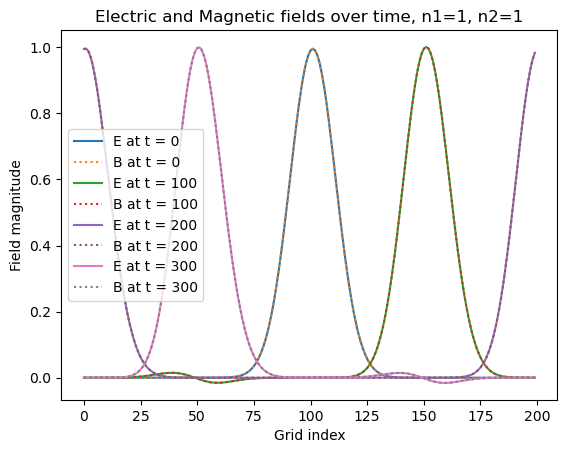

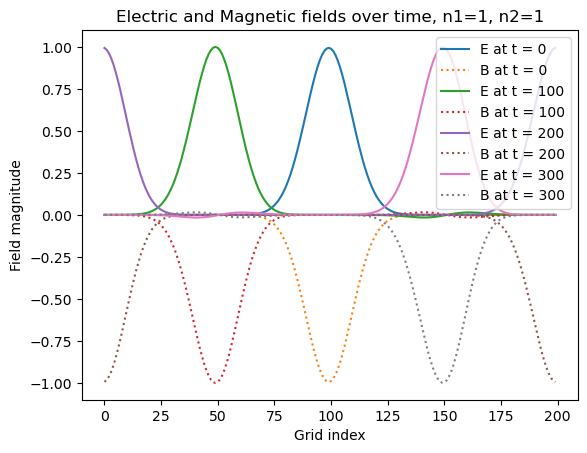

In [9]:
# (a)

def em(n1, n2, center, flipB=True):
    """
    Return None. Plot the E and B fields at different tiems.
    Args: n1, n2 -> indices of refraction
          center -> center of the Gaussian profile
    """

    # Set up grid in space and time
    nx = 200
    nt = 400
    dx = 0.2
    dt = 0.1
    E = np.zeros(nx)
    B = np.zeros(nx)
    
    # Set up indices of refraction
    n = np.ones(nx)
    n[:nx//2] = n[:nx//2]*n1
    n[nx//2:] = n[nx//2:]*n2

    # Gaussian profile
    def gaussian(nx):
        return np.exp(-((np.arange(nx) - center) ** 2) / (2 * 10 ** 2))

    # Initialize E and B as Gaussian profiles
    E_prev = n*gaussian(nx)
    if flipB:
        B_prev = -E_prev
    else:
        B_prev = E_prev
    
    # First order first step
    E = E_prev - (dt/dx)*(np.roll(B_prev, -1) - np.roll(B_prev, 1))/n**2
    B = B_prev - (dt/dx)*(np.roll(E_prev, -1) - np.roll(E_prev, 1))
    
    # Leapfrog update
    for i in range(nt):
        # Compute new values and update the previous ones
        E_new = E_prev - (dt/dx)*(np.roll(B, -1) - np.roll(B, 1))/n**2
        B_new = B_prev - (dt/dx)*(np.roll(E, -1) - np.roll(E, 1))
        E_prev, B_prev = E, B
        E, B = E_new, B_new

        if i % 100 == 0:
            plt.plot(E, label=f'E at t = {i}')
            plt.plot(B, ':', label=f'B at t = {i}')
            plt.title('Electric and Magnetic fields over time, n1=%d, n2=%d'%(n1,n2))
            plt.xlabel('Grid index')
            plt.ylabel('Field magnitude')
            plt.legend()

    plt.show()
            
em(1,1, 100, flipB=False)  # Index 1 across the grid, gaussian profiles centered
em(1,1, 100, flipB=True)

The plots above show the time evolution of the electric and magnetic fields in region with a uniform index of refraction. The first plot shows overlapping E and B fields, while the second plot shows the case where B starts with an opposite sign than E. In both cases, the waves propagate without changing shape. However, we can notice some minor dispersion near the tail of the Gaussian shapes. Given E and B opposite signs at the start does not affect the propagation at all, except of course that B is flipped.

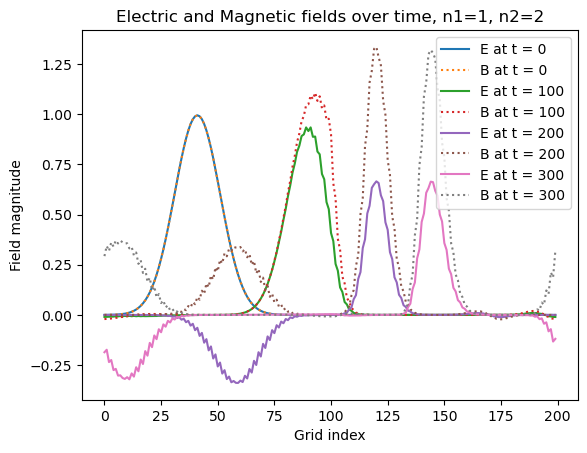

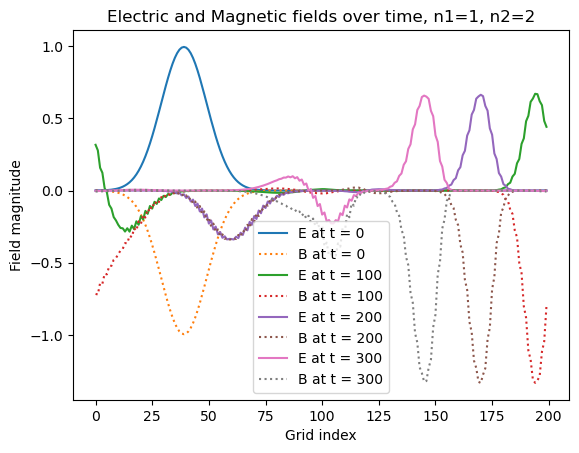

In [10]:
# (b)

em(1,2, 40, flipB=False)  # Left index 1, right index 2, Gaussian profiles in the left region
em(1,2, 40, flipB=True)

The plots above show the time evolution of the electric and magnetic waves propagating from a region of lower index of refraction to a region of higher index of refraction. We can observe that upon hitting the boundary, the reflected part of E has is flipped, with a decreases in amplitude with respect to the incident wave. This is similar with B, except it's not flipped. The transmitted part of E has a reduced amplitude, and B has an increased amplitude. The results agree with the formulae.

\begin{equation}
    r = \frac{n_1 - n_2}{n_1 + n_2}
\end{equation}

\begin{equation}
    t = \frac{2n_1}{n_1 + n_2}
\end{equation}


In our case, we have $n_1 = 1$ and $n_2 = 2$. This gives $r = -1/3$ and $t = 2/3$. This result matches the amplitude and phase change observed in E. To understand the behaviour for B, we have the following relations:

\begin{equation}
    B_r \propto -E_r/v_1,
\end{equation}

\begin{equation}
    B_t \propto E_t/v2.
\end{equation}

We can see analytically that the reflected part of B should have the same amplitude as E, but flipped. As for the transmitted part, waves propagate slower in a medium with a higher index of refraction, giving $v_1 > v_2$. Therefore, it makes sense that we see the transmitted part of B having an increase in amplitude.